In [1]:
import tensorflow as tf

c:\users\srinivas\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
image_index = 7777

In [5]:
print(y_train[image_index])

8


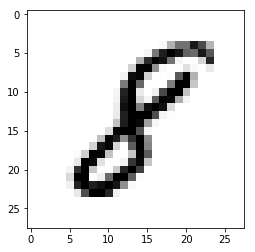

In [7]:
plt.imshow(x_train[image_index], cmap='Greys')

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.2136 - acc: 0.9348
Epoch 2/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.0863 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0585 - acc: 0.9818
Epoch 4/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.0426 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.0357 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0297 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.0253 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0222 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0202 - acc: 0.9933
Epoch 10/10
60000/60000 [==============================] - 21s 356us/step - loss: 

In [16]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 109us/step


[0.06323756487224783, 0.9842]

In [19]:
test_img_index = 4444
print(x_test[test_img_index])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

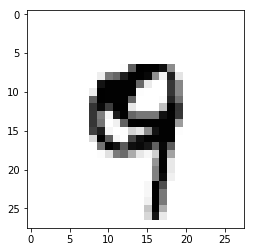

In [20]:
plt.imshow(x_test[test_img_index].reshape(28, 28), cmap='Greys')

In [22]:
pred = model.predict(x_test[test_img_index].reshape(1, 28, 28, 1))
print(pred.argmax())

9
